In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing dataset

1.Since data is in form of excel file we have to use pandas read_excel to load the data

2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row


3.Check whether any null values are there or not. if it is present then following can be done:-

A. Imputing data using imputing method in sklearn


B. Filling the NaN values with mean,median and mode using fillna() method

4.Descibe data-->which can give statistical analysis

In [2]:
# loading the dataset in the train_data dataframe
train_data=pd.read_excel(r"Data_Train.xlsx")

In [3]:
# setting to display all columns of the dataframe
pd.set_option('display.max_columns',None)

In [4]:
# looking at the dataframe
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# getting information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


** Only 1 entry in the column "Total_Stops" and "Route" is missing

In [6]:
# Checking the number of null values in each column
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Since there is only 1 entry missing we can drop that particular row from the dataframe without loosing much information
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [9]:
# Extracting the day of the journey
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [10]:
# Extracting the month of the journey
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [11]:
# Since we have extracted information from the "Date_of_Journey" column we can drop it from the dataframe
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
# Extracting Departute_hour
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour

In [13]:
# Extracting Departure_minutes
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

In [14]:
# Since we have extracted information from the "Dep_Time" column we can drop it from the dataframe
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [15]:
# Extracting Arrival_hour
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [16]:
# Extracting Arrival_minute
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [17]:
# Since we have Extracted "Arrival_hour" and "Arrival_minutes" from the "Arrival_Time" we can drop this column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [18]:
# time taken to reach the destination from the source is called duration
# we will extract the "Duration_hour" and "Duration_minute" from the "Duration"

duration=list(train_data['Duration'])

for i in range(len(duration)):
    if duration[i].split()!=2:          # Checking if entry only contain hours or minutes
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]
        
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))        # Extracting hour 
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))         # Extracting minutes

train_data['Duration_hour']=duration_hour
train_data['Duration_min']=duration_min

In [19]:
# Since we have extracted information from the "Duration" column now we can drop it from the data frame
train_data.drop(['Duration'],axis=1,inplace=True)

In [20]:
# Peek at the data
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handeling Categorical data

One can find many ways to handel categorical data , Some of the basic ways are:-

1. Nominal data-->data is not in any order -->OneHotEncoder can be used

2. Ordinal data-->data that has some order-->LabelEncoder can be used

In [21]:
# Frequency of different Airlines
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

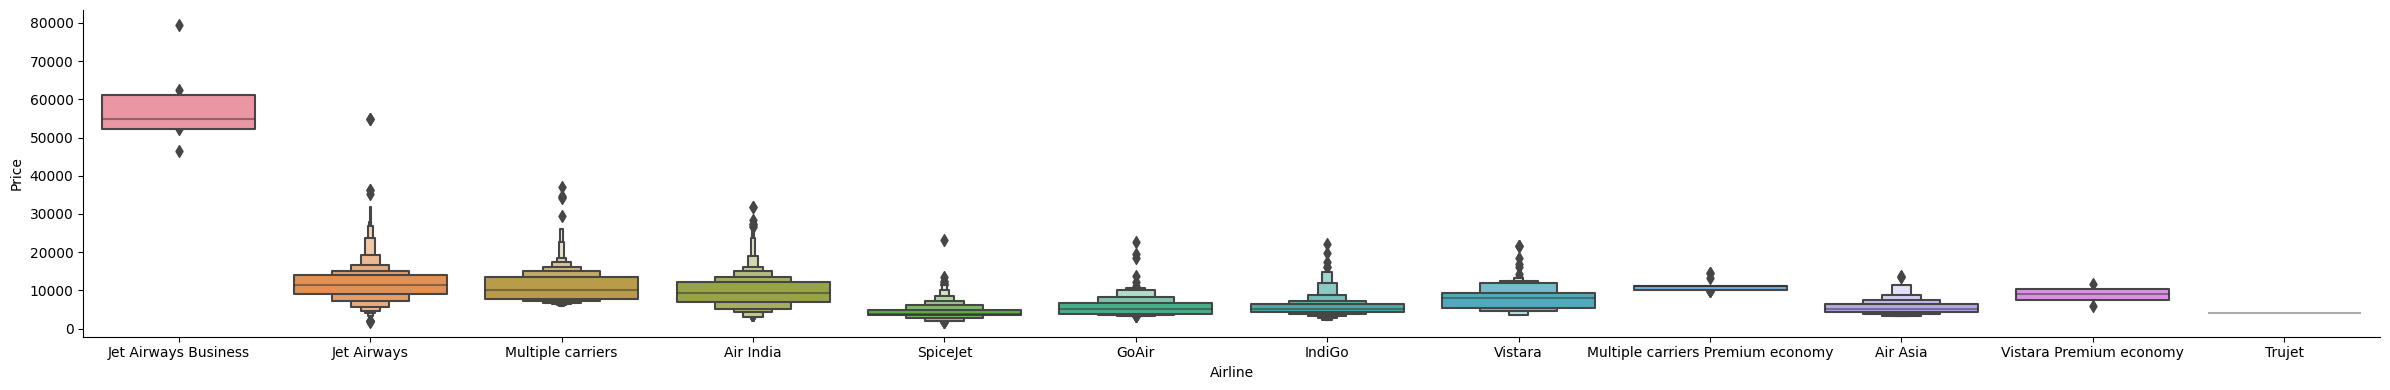

In [22]:
# Airline vs Price
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=6)

From the above graph we can conclude that "Jet Airways Business" airlines has the highest ticket price

 We can also conclude that all other airlines have similar median ticket price

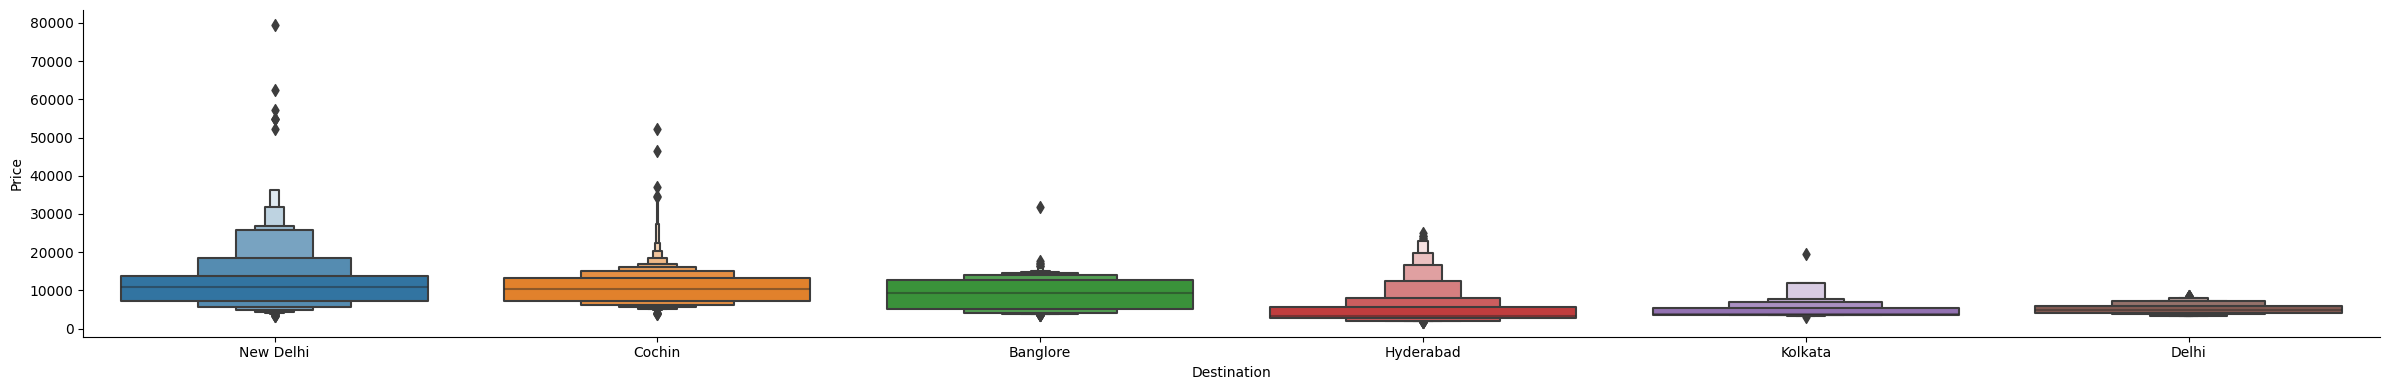

In [23]:
# Destination vs Price
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=6)

Median ticket price to all "Destination" is similar.

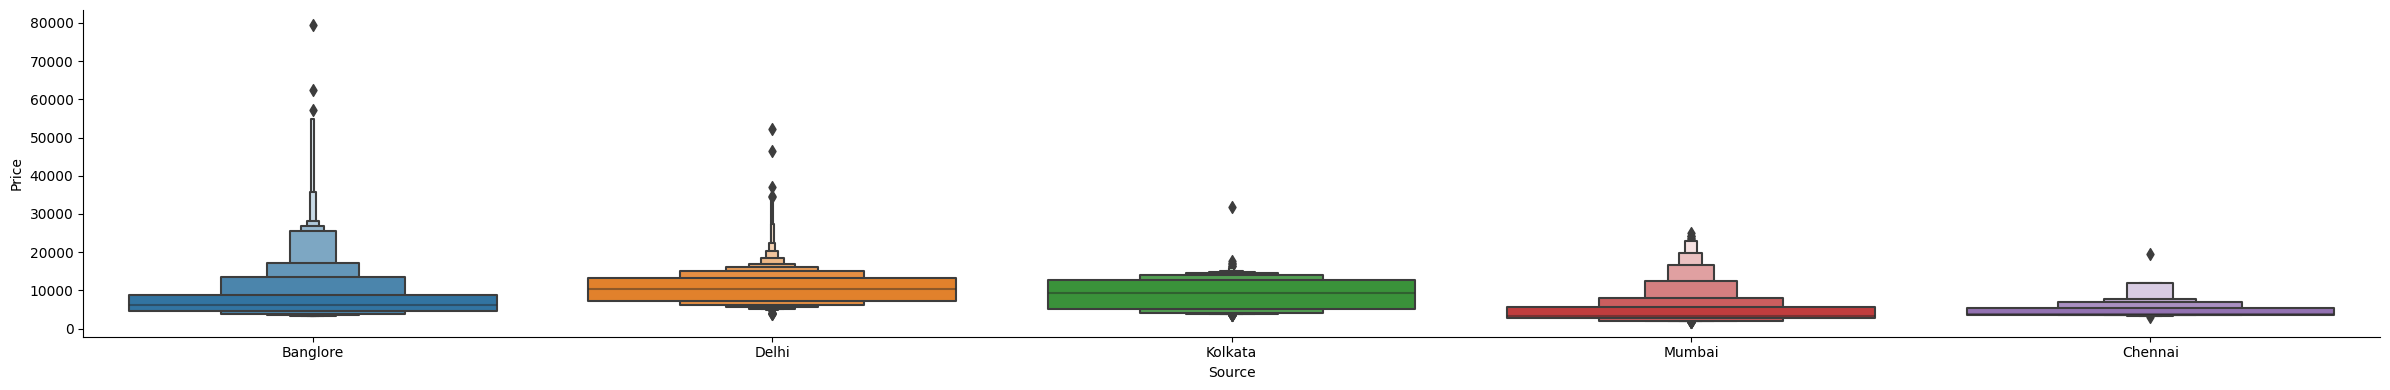

In [24]:
# Source vs Price
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=6)

Median ticket price from all "Source" is similar.

In [25]:
# OneHotEncoding the airline 
Airline=pd.get_dummies(train_data['Airline'],drop_first=True)

In [26]:
# OneHotEncoding the Destination
Destination=pd.get_dummies(train_data['Destination'],drop_first=True)

In [27]:
# OneHotEncoding the Source
Source=pd.get_dummies(train_data['Source'],drop_first=True)

In [28]:
# Since we have created OneHotEncoded dataframes for the "Airline","Destination" and "Source" we can drop them from the dataframe
train_data.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [29]:
# Concat "Airline","Destination","Source" and "train_data" dataframe
data_train=pd.concat([train_data,Airline,Destination,Source],axis=1)

In [30]:
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
# Checking the frequency of different values in "Additional_info" column
data_train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

*Most of the entries does not provide any additional information,so we can drop this column from the dataframe

In [32]:
# droping the "Additional_Info" column from the dataframe
data_train.drop(['Additional_Info'],axis=1,inplace=True)

In [33]:
# From observation we can see that "Route" and "Total_Stops" represents the same information so we can drop "Route" column
data_train.drop(['Route'],axis=1,inplace=True)

In [34]:
# frequency of different stop_number in "Total_Stops" column
data_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# Performing LabelEncoding on the column "Total_Stops"
data_train['Total_Stops']=data_train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [36]:
data_train.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [37]:
data_train.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
data_train.Trujet.value_counts()

0    10681
1        1
Name: Trujet, dtype: int64

In [39]:
# Since there is only "one" flight of the airline "Trujet" we can drop this column.
data_train.drop(['Trujet'],axis=1,inplace=True)

In [40]:
data_train.shape

(10682, 29)

# Modeling the test_data

In [41]:
# loading the test_data
test_data=pd.read_excel(r"Test_set.xlsx")

In [42]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
# Extracting the day of the journey
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting the month of the journey
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month

# Since we have extracted information from the "Date_of_Journey" column we can drop it from the dataframe
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

# Extracting Departute_hour
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour

# Extracting Departure_minutes
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute

# Since we have extracted information from the "Dep_Time" column we can drop it from the dataframe
test_data.drop(['Dep_Time'],axis=1,inplace=True)

# Extracting Arrival_hour
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting Arrival_minute
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute

# Since we have Extracted "Arrival_hour" and "Arrival_minutes" from the "Arrival_Time" we can drop this column
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

# time taken to reach the destination from the source is called duration
# we will extract the "Duration_hour" and "Duration_minute" from the "Duration"

duration=list(test_data['Duration'])

for i in range(len(duration)):
    if duration[i].split()!=2:          # Checking if entry only contain hours or minutes
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]
        
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))        # Extracting hour 
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))         # Extracting minutes

test_data['Duration_hour']=duration_hour
test_data['Duration_min']=duration_min

# Since we have extracted information from the "Duration" column now we can drop it from the data frame
test_data.drop(['Duration'],axis=1,inplace=True)

# OneHotEncoding the airline 
Airline=pd.get_dummies(test_data['Airline'],drop_first=True)

# OneHotEncoding the Destination
Destination=pd.get_dummies(test_data['Destination'],drop_first=True)

# OneHotEncoding the Source
Source=pd.get_dummies(test_data['Source'],drop_first=True)

# Since we have created OneHotEncoded dataframes for the "Airline","Destination" and "Source" we can drop them from the dataframe
test_data.drop(['Airline','Destination','Source'],axis=1,inplace=True)

# Concat "Airline","Destination","Source" and "test_data" dataframe
data_test=pd.concat([test_data,Airline,Destination,Source],axis=1)

# droping the "Additional_Info" column from the dataframe
data_test.drop(['Additional_Info'],axis=1,inplace=True)

# From observation we can see that "Route" and "Total_Stops" represents the same information so we can drop "Route" column
data_test.drop(['Route'],axis=1,inplace=True)

In [46]:
data_test.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,1 stop,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
data_test.shape

(2671, 28)

In [48]:
data_test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
data_test.Total_Stops=data_test.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [50]:
# rearranging the data
price=data_train.Price
data_train.drop(['Price'],axis=1,inplace=True)
data_train['Price']=price

In [51]:
data_train.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Price
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3897
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7662


In [52]:
data_test.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot: >

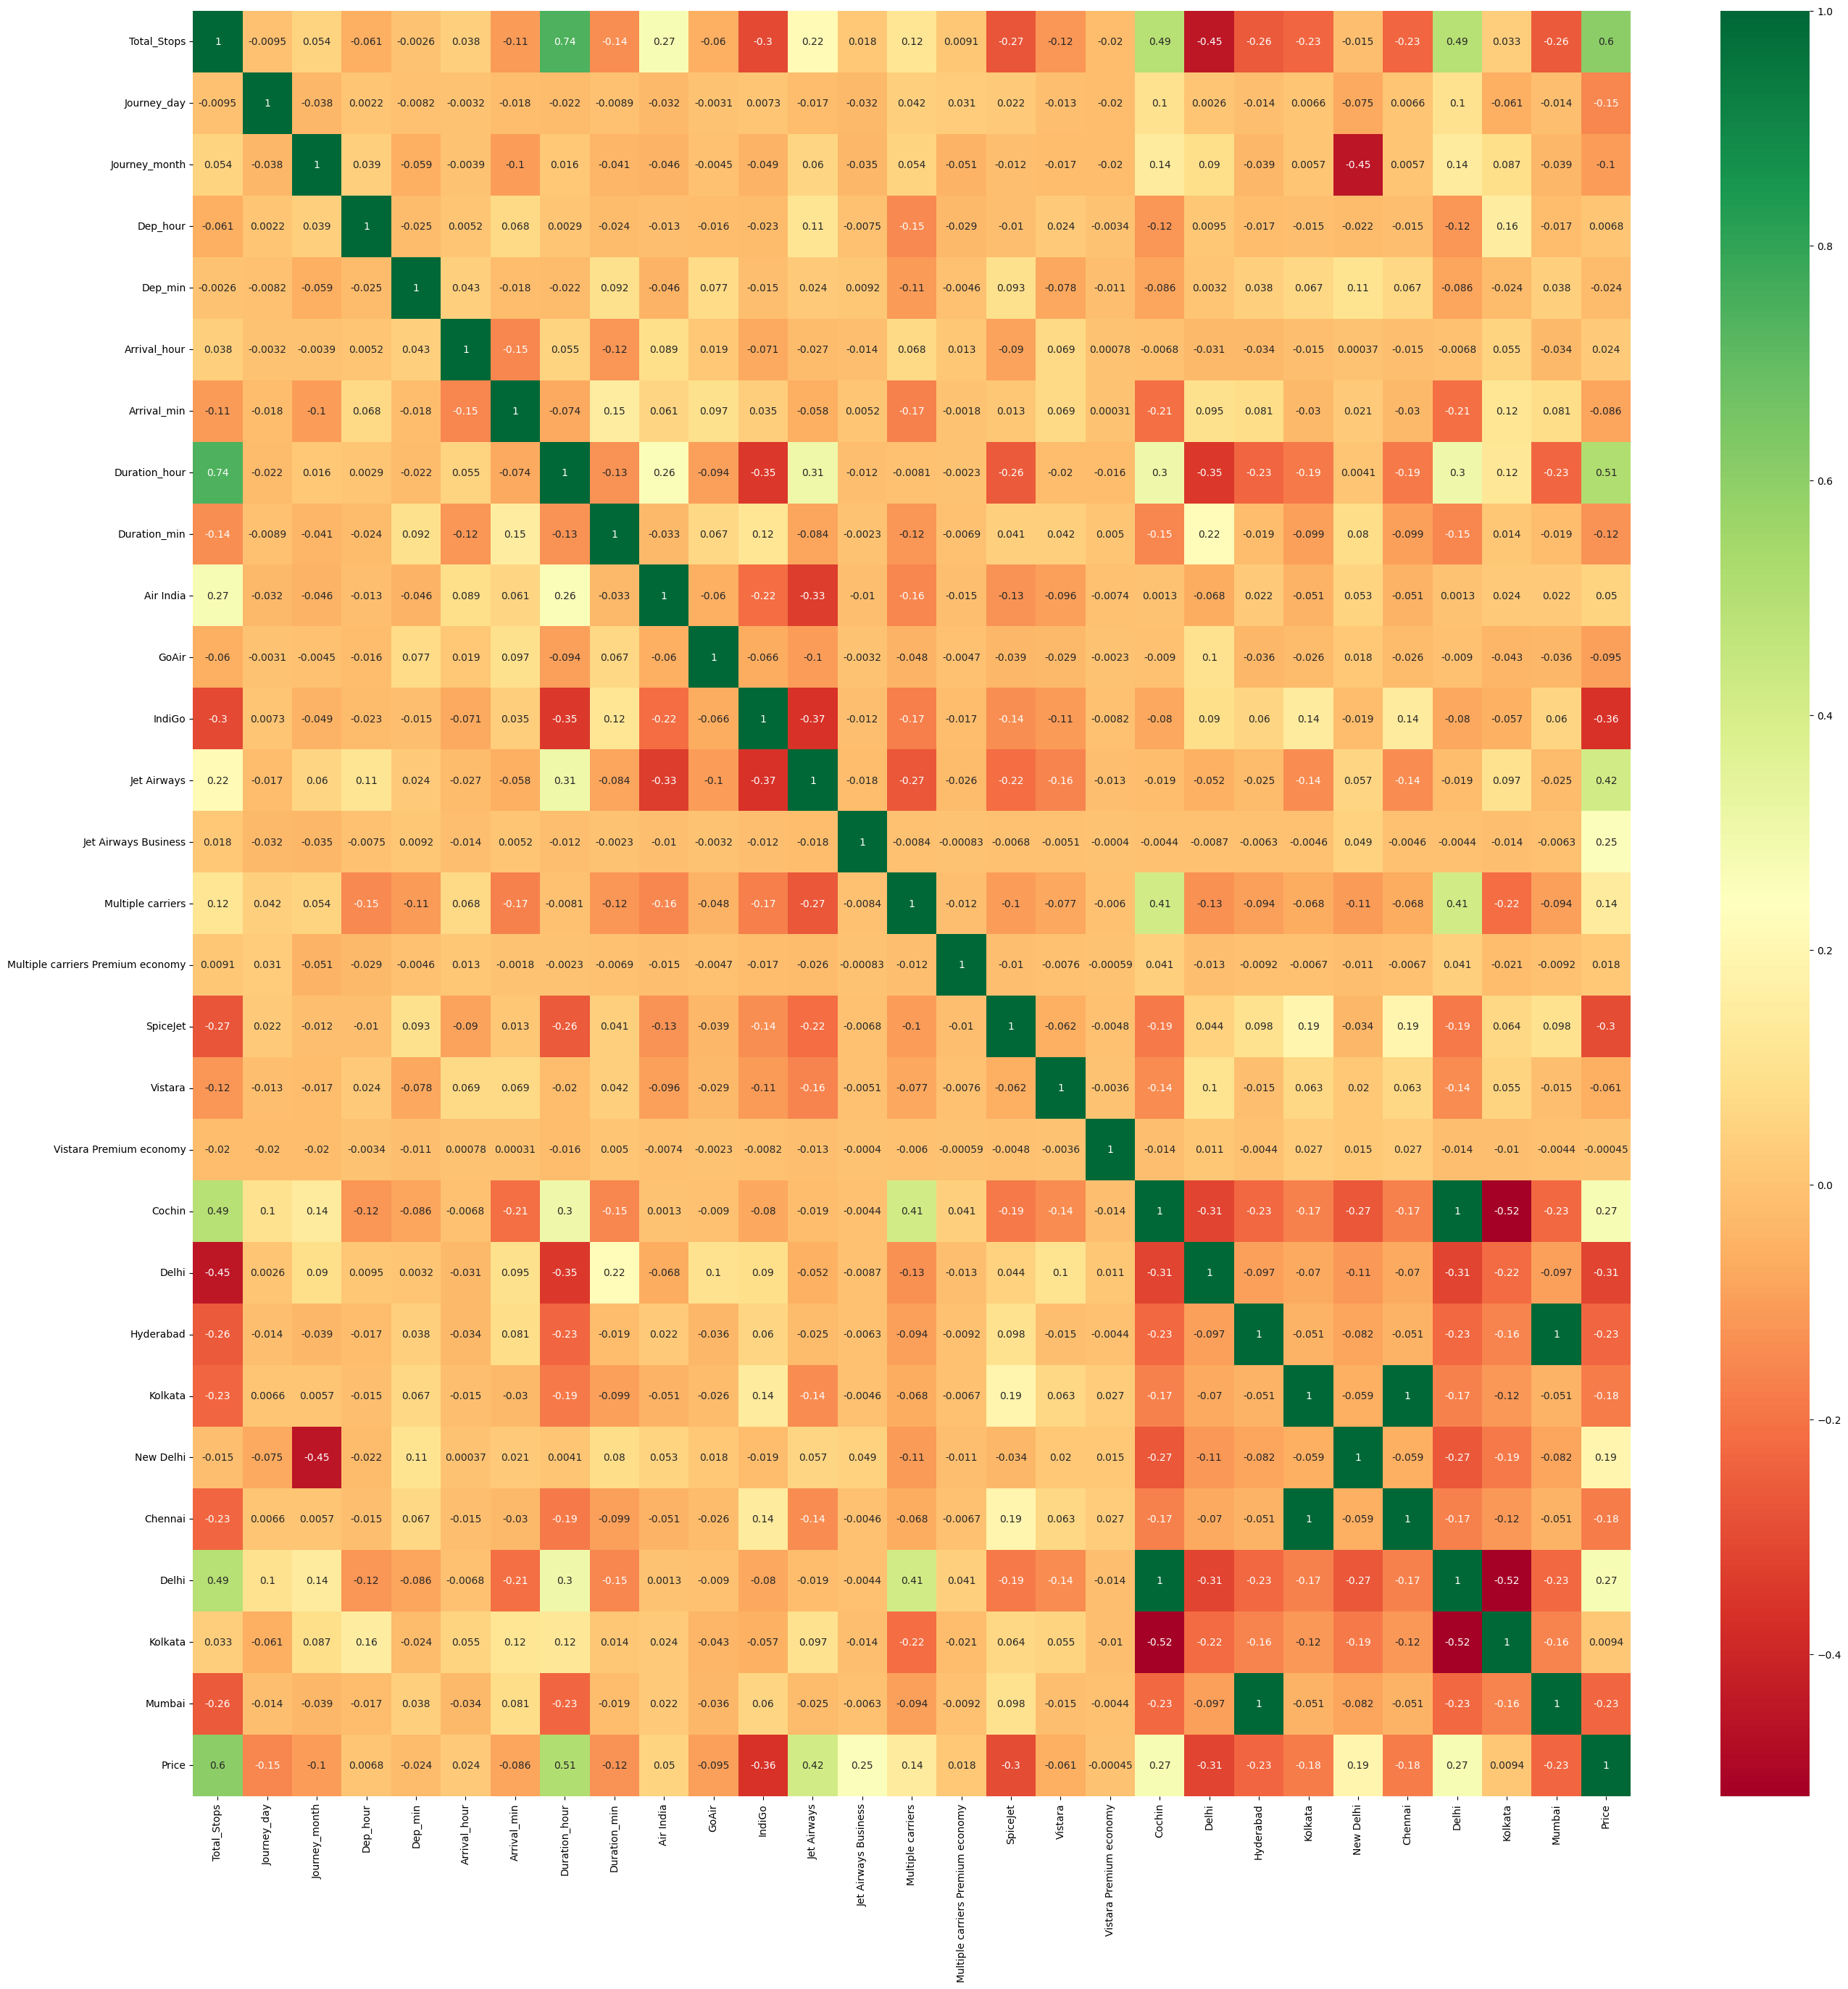

In [53]:
# Correlation between different attributes
plt.figure(figsize=(32,32))
sns.heatmap(data_train.corr(),annot=True,cmap="RdYlGn")

In [170]:
# Saving the processed data
data_train.to_csv('processed_train_data',index=False)
data_test.to_csv('processed_test_data',index=False)

# Model training

In [54]:
# importing required library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
# Performance metric used for the Regression Problem
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

* A Model with low value of "mean_absolute_error","mean_squared_error" is considered to give high accuracy.

* residual=original_value-predicted_value

* r2_score=1-(sum of squared residuals / total sum of squares)

* Adjusted_r2=1 - ( (1 - r2_score) * (n - 1) / (n - k - 1) )
    * "n" is the number of observations
    * "k" is the number of predictors in the model

* Adjusted_r2 is always less than r2_score

* A Model with high value of "r2_score" is considered to be a better fit for data.

* An increasing graph between original values and predicted values is showing that model is performing good.

* A bell shaped curve for the "residuals" indicated that model is fitted well to povide high accuracy.

* Uniform distribution of the original_values and resuduals indicates that model is fitted well with the data.

In [56]:
X=data_train.iloc[:,:-1]
y=data_train.iloc[:,-1]

In [57]:
# splitting the data in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [58]:
# Standerdization of data 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Ordinary Least Squares

In [92]:
# Importing linear model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [94]:
# Fitting the data
model.fit(X_train,y_train)

LinearRegression()

In [95]:
# Making prediction on unseen data
y_predict=model.predict(X_test)

In [96]:
# Finding residuals
residuals=y_test-y_predict

Text(0, 0.5, 'predicted_value')

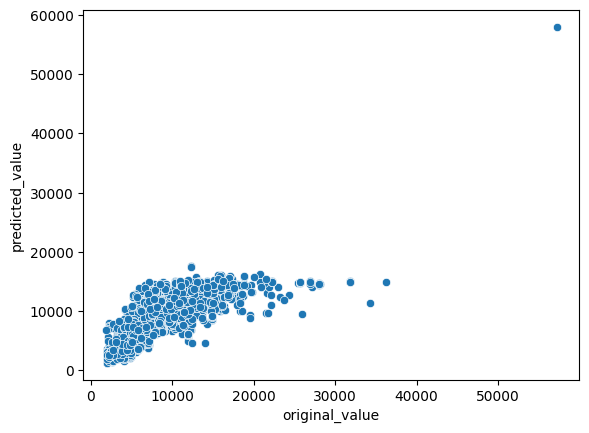

In [100]:
# Scatter plot between original and predicted values
sns.scatterplot(y=y_predict,x=y_test)
plt.xlabel('original_value')
plt.ylabel('predicted_value')

Text(0, 0.5, 'residual_value')

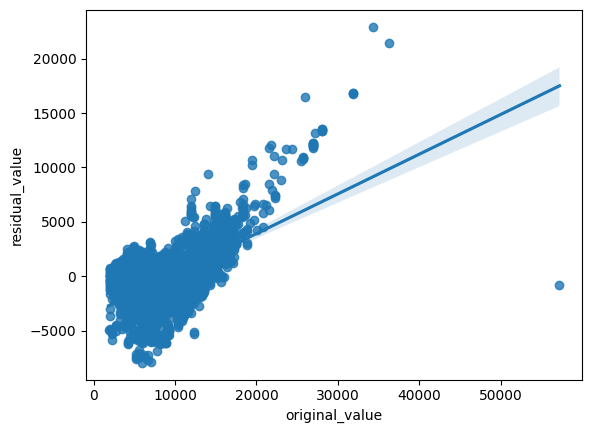

In [102]:
# Scatter plot between original and residual values
sns.regplot(y=residuals,x=y_test)
plt.xlabel('original_value')
plt.ylabel('residual_value')

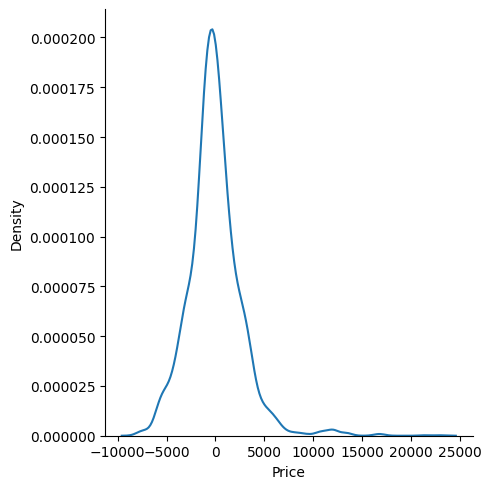

In [103]:
# Density plot of residuals values
sns.displot(residuals,kind='kde')

In [104]:
print("Mean_absolute_error-->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error-->",mean_squared_error(y_test,y_predict))
print("R2_score-->",r2_score(y_test,y_predict))
print("Adjusted_R2-->",1-((1-r2_score(y_test,y_predict))*(len(y_test)-1)/(len(y_test)-np.shape(X_test)[1]-1)))

Mean_absolute_error--> 1938.080608697831
Mean_squared_error--> 7622885.832260248
R2_score--> 0.6263460974372386
Adjusted_R2--> 0.6230519194549473


In [108]:
# Accuracy score of the model
print("Model_Accuracy-->",model.score(X_test,y_test))

Model_Accuracy--> 0.6263460974372386


# Ridge Regression

In [109]:
# Importing the module
from sklearn.linear_model import Ridge

Text(0, 0.5, 'MSE')

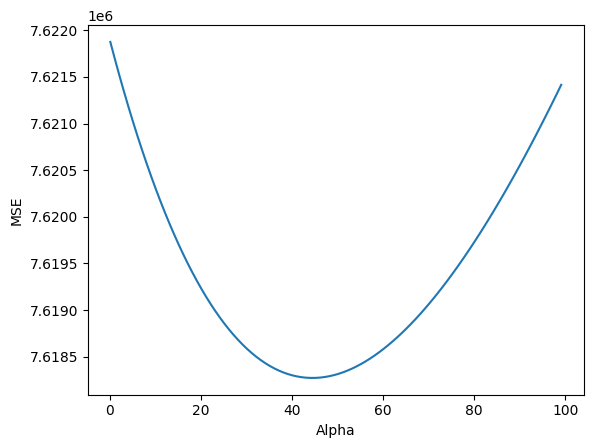

In [113]:
# Finding the best value of "alpha" that corresponds to higher accuracy

error=[]
alpha=[0.1]
for i in range(100):
    model=Ridge(alpha=alpha[i])
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    error.append(mean_squared_error(y_test,y_predict))
    alpha.append(alpha[i]+1)

alpha.pop()

sns.lineplot(x=alpha,y=error)
plt.xlabel('Alpha')
plt.ylabel('MSE')

In [117]:
# Optimum value of alpha that gives the minimum error
opt_alpha=alpha[error.index(min(error))]
opt_alpha

44.1

In [118]:
# Model creation with optimum value of alpha
model=Ridge(alpha=44.1)

In [120]:
# Fitting the data
model.fit(X_train,y_train)

Ridge(alpha=44.1)

In [121]:
# Making prediction on unseen data
y_predict=model.predict(X_test)

In [122]:
# Finding residuals
residuals=y_test-y_predict

Text(0, 0.5, 'predicted_value')

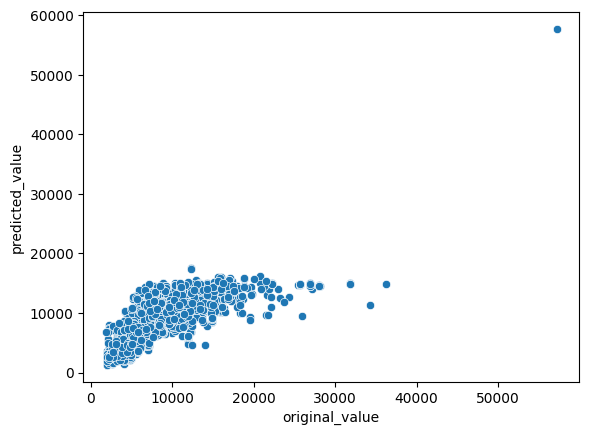

In [123]:
# Scatter plot between original and predicted values
sns.scatterplot(y=y_predict,x=y_test)
plt.xlabel('original_value')
plt.ylabel('predicted_value')

Text(0, 0.5, 'residual_value')

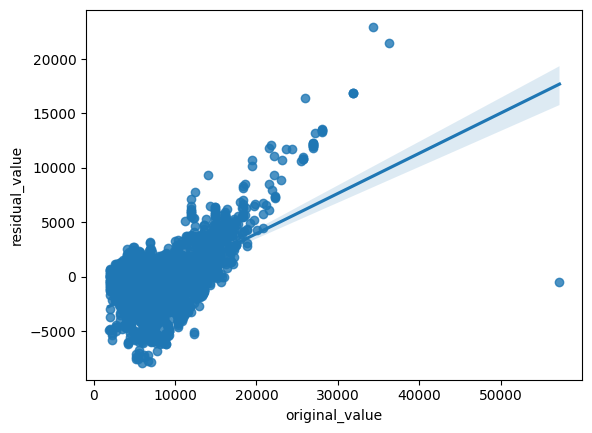

In [124]:
# Scatter plot between original and residual values
sns.regplot(y=residuals,x=y_test)
plt.xlabel('original_value')
plt.ylabel('residual_value')

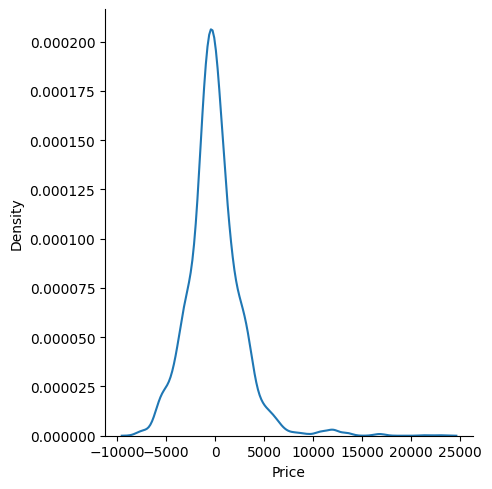

In [125]:
# Density plot of residuals values
sns.displot(residuals,kind='kde')

In [126]:
print("Mean_absolute_error-->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error-->",mean_squared_error(y_test,y_predict))
print("R2_score-->",r2_score(y_test,y_predict))
print("Adjusted_R2-->",1-((1-r2_score(y_test,y_predict))*(len(y_test)-1)/(len(y_test)-np.shape(X_test)[1]-1)))

Mean_absolute_error--> 1935.2719849104003
Mean_squared_error--> 7618272.724223375
R2_score--> 0.6265722199135357
Adjusted_R2--> 0.6232800354543352


In [127]:
# Accuracy score of the model
print("Model_Accuracy-->",model.score(X_test,y_test))

Model_Accuracy--> 0.6265722199135357


# Lasso Regression

In [128]:
# Importing the required libraby
from sklearn.linear_model import Lasso

Text(0, 0.5, 'MSE')

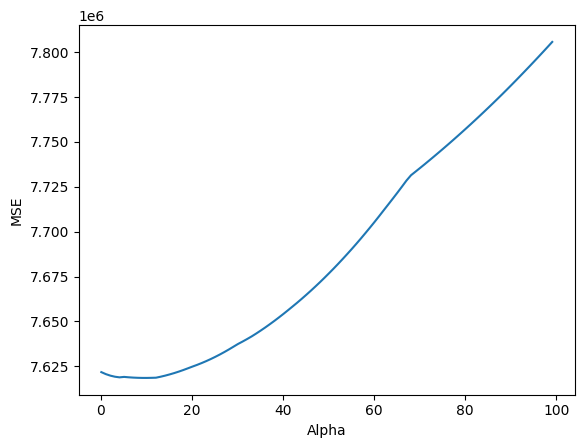

In [129]:
# Finding the best value of "alpha" that corresponds to higher accuracy

error=[]
alpha=[0.1]
for i in range(100):
    model=Lasso(alpha=alpha[i])
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    error.append(mean_squared_error(y_test,y_predict))
    alpha.append(alpha[i]+1)

alpha.pop()

sns.lineplot(x=alpha,y=error)
plt.xlabel('Alpha')
plt.ylabel('MSE')

In [130]:
# Optimum value of alpha that gives the minimum error
opt_alpha=alpha[error.index(min(error))]
opt_alpha

10.1

In [131]:
# Model creation with the optimal value of alpha
model=Lasso(alpha=10.1)

In [132]:
# Fitting the data
model.fit(X_train,y_train)

Lasso(alpha=10.1)

In [133]:
# Making prediction on unseen data
y_predict=model.predict(X_test)

In [134]:
# Finding residuals
residuals=y_test-y_predict

Text(0, 0.5, 'predicted_value')

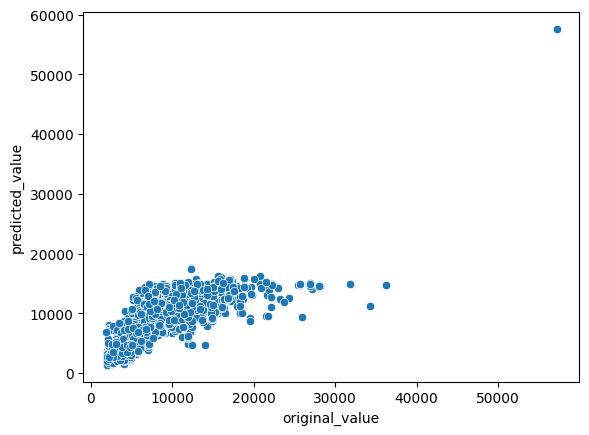

In [135]:
# Scatter plot between original and predicted values
sns.scatterplot(y=y_predict,x=y_test)
plt.xlabel('original_value')
plt.ylabel('predicted_value')

Text(0, 0.5, 'residual_value')

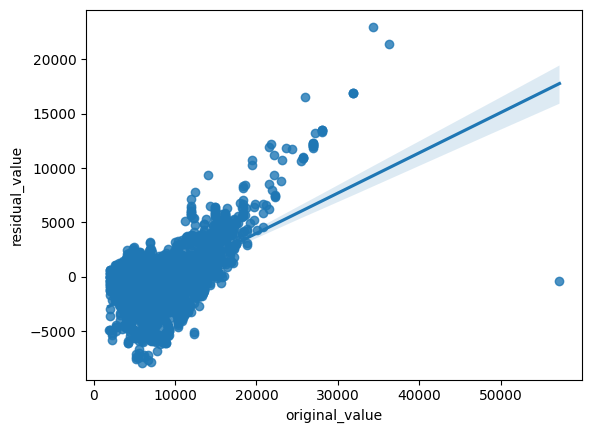

In [136]:
# Scatter plot between original and residual values
sns.regplot(y=residuals,x=y_test)
plt.xlabel('original_value')
plt.ylabel('residual_value')

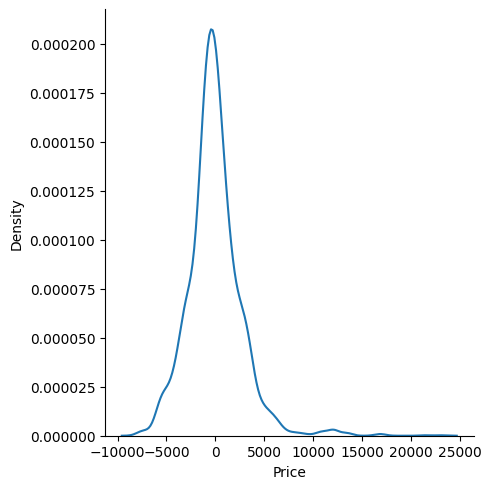

In [137]:
# Density plot of residuals values
sns.displot(residuals,kind='kde')

In [138]:
print("Mean_absolute_error-->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error-->",mean_squared_error(y_test,y_predict))
print("R2_score-->",r2_score(y_test,y_predict))
print("Adjusted_R2-->",1-((1-r2_score(y_test,y_predict))*(len(y_test)-1)/(len(y_test)-np.shape(X_test)[1]-1)))

Mean_absolute_error--> 1932.4545149154935
Mean_squared_error--> 7618532.704838479
R2_score--> 0.6265594763445566
Adjusted_R2--> 0.623267179536511


In [139]:
# Accuracy score of the model
print("Model_Accuracy-->",model.score(X_test,y_test))

Model_Accuracy--> 0.6265594763445566


# Randomforest

In [172]:
# Importing the required library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [134]:
# Create the model 
model=RandomForestRegressor(n_estimators=100,min_samples_leaf=1,min_samples_split=2,
                            max_features=None,max_depth=None,criterion='squared_error',max_samples=None)

In [135]:
# Fitting the data
model.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [136]:
# Making prediction on unseen data
y_predict=model.predict(X_test)

In [137]:
# Finding residuals
residuals=y_test-y_predict

Text(0, 0.5, 'predicted_value')

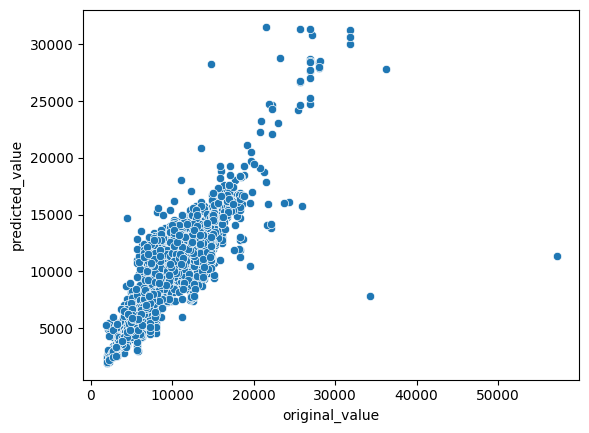

In [138]:
# Scatter plot between original and predicted values
sns.scatterplot(y=y_predict,x=y_test)
plt.xlabel('original_value')
plt.ylabel('predicted_value')

Text(0, 0.5, 'residual_value')

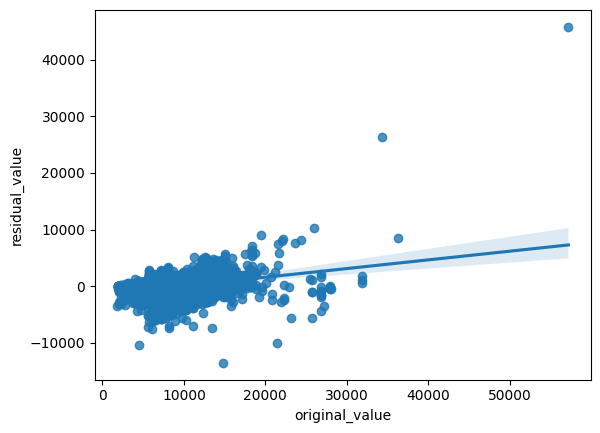

In [139]:
# Scatter plot between original and residual values
sns.regplot(y=residuals,x=y_test)
plt.xlabel('original_value')
plt.ylabel('residual_value')

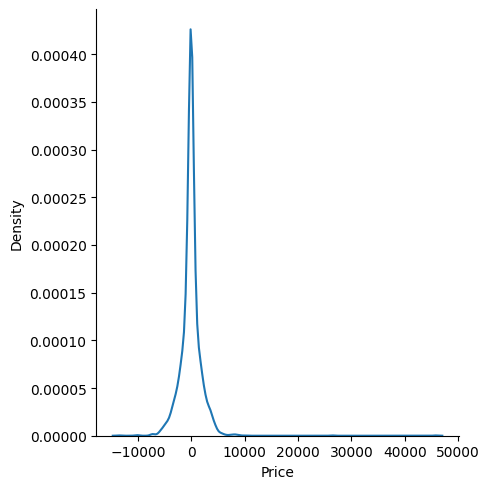

In [140]:
# Density plot of residuals values
sns.displot(residuals,kind='kde')

In [141]:
print("Mean_absolute_error-->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error-->",mean_squared_error(y_test,y_predict))
print("R2_score-->",r2_score(y_test,y_predict))
print("Adjusted_R2-->",1-((1-r2_score(y_test,y_predict))*(len(y_test)-1)/(len(y_test)-np.shape(X_test)[1]-1)))

Mean_absolute_error--> 1165.1550206074564
Mean_squared_error--> 4013852.944895816
R2_score--> 0.8032514391300212
Adjusted_R2--> 0.8015168800291523


In [142]:
# Accuracy score of the model
print("Model_Accuracy-->",model.score(X_test,y_test))

Model_Accuracy--> 0.8032514391300212


* There are number of parameters that can be passed to the RandomForestRegressor class, So to find the combination of best parameters we will use RandomizedSearchCV

Some of the Parameters used are:-

* n_estimators-->The number of trees in the forest.
* criterion-->The function to measure the quality of a split.
* max_depth-->The maximum depth of the tree.
* min_samples_split-->The minimum number of samples required to split an internal node.
* min_samples_leaf-->The minimum number of samples required to be at a leaf node.
* max_features-->The number of features to consider when looking for the best split.
* max_samples-->If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [171]:
# creating dictionary of the combination of parameters
param={
    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'criterion':["squared_error"],
    'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_leaf':[1, 2, 5, 10],
    'min_samples_split':[2, 5, 10, 15, 100],
    'max_features':['auto', 'sqrt']
}

In [175]:
# Creating the randomised cross validation  model 
ran_cv=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param,cv=4,
                        n_iter=5,n_jobs=-1,verbose=2,scoring='accuracy')

In [176]:
ran_cv.fit(X_train,y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [183]:
# Best combination of different parameters that result in best model for prediction.
ran_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'squared_error'}

In [184]:
# Creating a randomforest model with best_parameters
model=RandomForestRegressor(n_estimators=1000,min_samples_split=10,min_samples_leaf=1,
                            max_features='sqrt',max_depth=30,criterion='squared_error')

In [185]:
# Fitting the model
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=1000)

In [188]:
# Making prediction on unseen data
y_predict=model.predict(X_test)

In [189]:
# Finding residuals
residuals=y_test-y_predict

Text(0, 0.5, 'predicted_value')

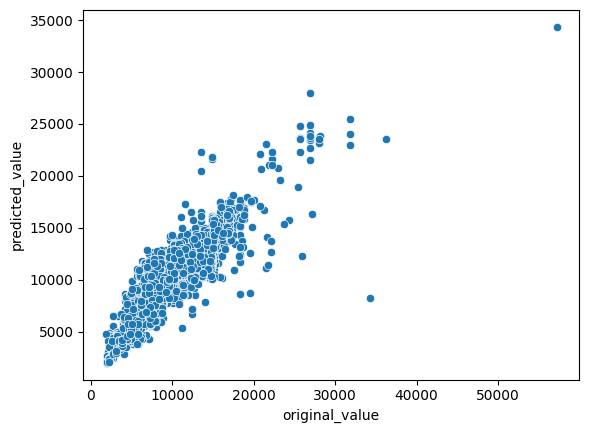

In [190]:
# Scatter plot between original and predicted values
sns.scatterplot(y=y_predict,x=y_test)
plt.xlabel('original_value')
plt.ylabel('predicted_value')

Text(0, 0.5, 'residual_value')

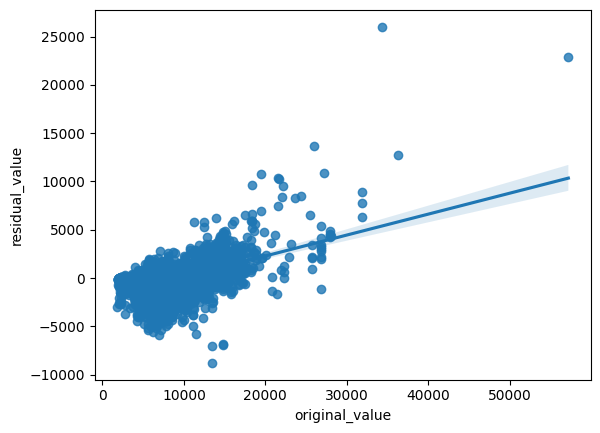

In [191]:
# Scatter plot between original and residual values
sns.regplot(y=residuals,x=y_test)
plt.xlabel('original_value')
plt.ylabel('residual_value')

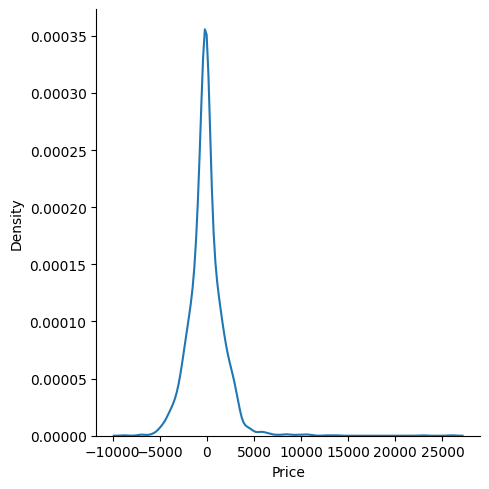

In [192]:
# Density plot of residuals values
sns.displot(residuals,kind='kde')

In [193]:
print("Mean_absolute_error-->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error-->",mean_squared_error(y_test,y_predict))
print("R2_score-->",r2_score(y_test,y_predict))
print("Adjusted_R2-->",1-((1-r2_score(y_test,y_predict))*(len(y_test)-1)/(len(y_test)-np.shape(X_test)[1]-1)))

Mean_absolute_error--> 1251.013286134737
Mean_squared_error--> 3561157.854597462
R2_score--> 0.825441367050118
Adjusted_R2--> 0.8239024370367058


In [194]:
# Accuracy score of the model
print("Model_Accuracy-->",model.score(X_test,y_test))

Model_Accuracy--> 0.825441367050118


* With the help of Hyperparameter Tuning we have increased the accuracy score of our model by 2%.

# Saving the Model

In [205]:
# importing required library
import gzip
import joblib

In [206]:
# Saving the regression model
with gzip.open('regression_model.gz', 'wb') as f:
    dump(model, f)

In [207]:
 # Saving the standerdisatioin model
with gzip.open('standerd_model.gz', 'wb') as f:
    dump(scaler, f)

In [208]:

# We can load the model with joblib and make prediction
regression_model=joblib.load('regression_model.gz')
scaler_model=joblib.load('standerd_model.gz')

In [209]:
# Make prediction as before
regression_model.predict(X_test)

array([16579.87680619,  6016.00635256,  8608.05749652, ...,
        5764.93093693,  3121.6748032 ,  6909.77544889])